<a href="https://colab.research.google.com/github/geovannathereza/curso-de-machine-learning/blob/main/Classificador_de_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificador de Vinhos utilizando Machine Learning**

Meu projeto consiste em usar machine learning para classificar tipos de vinho (Tinto ou branco).

Abaixo o import do pandas e o carregamento do conjunto de dados

In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
df = pd.read_csv('/content/wine_dataset.csv')

Utilizei o Head para visualizar as 5 primeiras colunas e o Tail para visualizar as 5 últimas

In [ ]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
df.tail(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


Conferi se havia algum valor nulo no dataset

In [ ]:
df.isnull().values.any()

False

Substitui os valores 'red' e 'white' para 1 e 0 no dataset

In [ ]:
tipos_de_vinho = {'red': 1, 'white': 0}
df['style'] = df['style'].map(tipos_de_vinho)

Quantidade de vinho tinto e vinho branco

In [ ]:
num_true = len(df.loc[df['style'] == 1])
num_false = len(df.loc[df['style'] == 0])
print('Quantidade de vinho Tinto: {0} ({1:2.2f}%)'.format(num_true, (num_true/ (num_true + num_false)) *100))
print('Quantidade de vinho Branco: {0} ({1:2.2f}%)'.format(num_false, (num_false/ (num_true + num_false)) *100))

Quantidade de vinho Tinto: 1599 (24.61%)
Quantidade de vinho Branco: 4898 (75.39%)


Gráfico com as Features

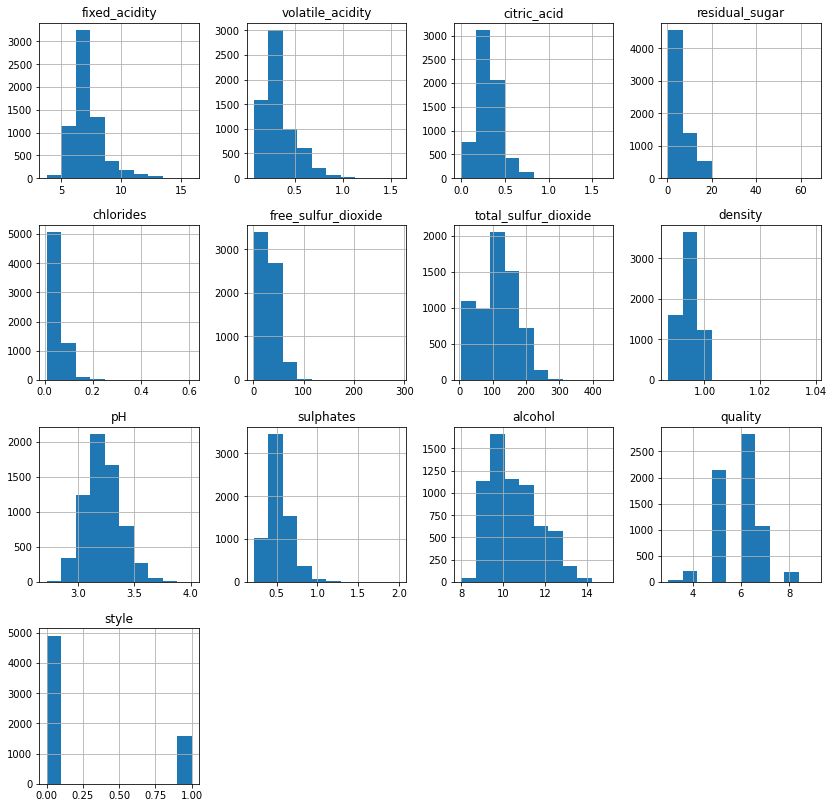

In [ ]:
df.hist(figsize=(14,14))
plt.show()

**Splitting**

Optei por utilizar 80% para treino e 20% para teste

Comecei importando o sklearn e o train_test_split

In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split

Defini X e Y

In [ ]:
atributos = ['fixed_acidity',	'residual_sugar', 'free_sulfur_dioxide',	'pH']
atrib_prev = ['style']

X = df[atributos].values
Y = df[atrib_prev].values

In [ ]:
X

array([[ 7.4 ,  1.9 , 11.  ,  3.51],
       [ 7.8 ,  2.6 , 25.  ,  3.2 ],
       [ 7.8 ,  2.3 , 15.  ,  3.26],
       ...,
       [ 6.5 ,  1.2 , 30.  ,  2.99],
       [ 5.5 ,  1.1 , 20.  ,  3.34],
       [ 6.  ,  0.8 , 22.  ,  3.26]])

In [ ]:
Y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

Definindo a quantidade de dados do teste

In [ ]:
split_test_size = 0.20
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=split_test_size, shuffle=True, random_state=84)

Porcentagem dos dados de treino e teste

In [ ]:
perc_treino = (len(X_treino)/len(df.index)) * 100
perc_treino = round(perc_treino, 2)
print(perc_treino, '%', 'para os dados de treino.')

perc_teste = (len(X_teste)/len(df.index)) * 100
perc_teste = round(perc_teste, 2)
print(perc_teste, '%', 'para os dados de teste.')

79.99 % para os dados de treino.
20.01 % para os dados de teste.


**Classificador Bayesiano (Naive Bayes)**


In [ ]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X_treino, Y_treino.ravel())

GaussianNB()

Verificando a Accuracy do modelo usando os dados de teste

In [ ]:
from sklearn import metrics
nb_predict_test = modelo.predict(X_teste)
nb_acc_test = metrics.accuracy_score(Y_teste, nb_predict_test)
nb_acc_test = (round(nb_acc_test, 2)) *100
print('Exatidão (Accuracy):', nb_acc_test, '%')

Exatidão (Accuracy): 86.0 %


Métricas

In [147]:
print(metrics.classification_report(Y_teste, nb_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       980
           1       0.67      0.88      0.76       320

    accuracy                           0.86      1300
   macro avg       0.81      0.87      0.83      1300
weighted avg       0.89      0.86      0.87      1300

